# **Team 8 Assignment - Movies Database 🎥** 


# Overview 

**Analyze factors that affect movie revenue to predict success of future movies**

Some movies do really well in the box office while others fail. Movies that are rated well do not necessarily have good revenues and vice versa. Our goal is to perform exploratory analysis on the factors that influence movie performance and use machine learning algorithms to predict the performance of movies before its release.

This dataset has been created by collecting data from TMDB and GroupLens (Kaggle link). The Movie Details, Credits and Keywords have been collected from the TMDB Open API. The Movie Links and Ratings have been obtained from the Official GroupLens website. For the purpose of this project, the collection of data from the above mentioned sources have been used from Kaggle. 


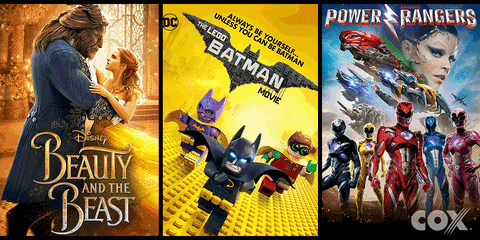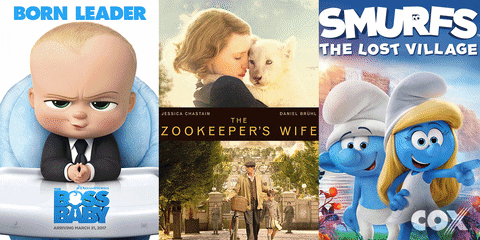

*This dataset consists of the following files:*

**movies_metadata.csv:** The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

**keywords.csv:** Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

**credits.csv:** Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

**links.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

**links_small.csv:** Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

**ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies.

# **1. Uploading Files 📁**

### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset

 credits.csv    keywords.csv      movies_metadata.csv    ratings_small.csv
'giphy 2.gif'   links.csv         movies_metadata.xlsx   Results/
 giphy.gif      links_small.csv   ratings.csv


## Importing necessary files

In [ ]:
#data processing libraries
import json
import datetime
import ast
import pandas as pd
import numpy as np
from scipy import stats

#plotting libraries
!pip install seaborn --upgrade
import seaborn as sns
import matplotlib.pyplot as plt

# libraries for model development
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Import packages for model performance evaluation
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.formula.api as smf

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading datasets 

In [ ]:
movies_metadata = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/movies_metadata.csv")
keywords = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/keywords.csv")
links = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/links.csv")
links_small = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/links_small.csv")
ratings_small = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/ratings_small.csv")
credits = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/credits.csv")
ratings = pd.read_csv("/content/drive/Shareddrives/Mod_4-IS833_Project_Team/The_Movies_Dataset/ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **2. Exploratory Phase**

## **Data Ingestion & Inspection 🔍**

### Movies dataset



Exploring columns, datatypes, number of nulls and more information through info(), head(), and describe()

In [ ]:
movies_metadata.info()
#movies_metadata.describe()
movies_metadata.head(2)
#movies_metadata.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


Lets look at the difference between original title and title.

In [ ]:
#Comparing values of title and original_title that are different
movies_metadata[movies_metadata['original_title'] != movies_metadata['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


Looks like title is the English version. We can use title for analysis and drop original_title.

Identifying zero revenues:


In [ ]:
print('Revenue is zero for ' + str(movies_metadata[movies_metadata['revenue'] == 0].shape[0]) + ' movies')
print(str(movies_metadata['revenue'].shape[0] - movies_metadata[movies_metadata['revenue'] == 0].shape[0]) + ' movies have a revenue recorded')

Revenue is zero for 38052 movies
7414 movies have a revenue recorded


If we want to use previous revenue for predictions, we have 7K records to perform analysis. 

Moving on to Budget:

In [ ]:
print(movies_metadata['budget'])
print('\nBudget is zero for ' + str(movies_metadata[movies_metadata['budget'] == np.nan].shape[0]) + ' movies')

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

Budget is zero for 0 movies


Therefore, we need to convert budget to Numeric values

In [ ]:
print(movies_metadata['production_countries'].unique())

["[{'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"
 ...
 "[{'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'SK', 'name': 'Slovakia'}]"
 "[{'iso_3166_1': 'CU', 'name': 'Cuba'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]"
 "[{'iso_3166_1': 'EG', 'name': 'Egypt'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"]


We also need to extract production countries, genres, and production companies in the required format.

How many movies belong to a collection? How many collections are there?



In [ ]:
x = movies_metadata['belongs_to_collection'].isna()
y = x[x==False]
print(str(y.count()) + ' movies belong to a collection')
x = movies_metadata['belongs_to_collection'].unique()
print('There are ' + str(x.size) + ' collections')

4494 movies belong to a collection
There are 1699 collections


### Keywords dataset

In [ ]:
keywords.info()
keywords.head()
print(keywords['keywords'][0])
print(keywords['keywords'][1])
print(keywords['keywords'][2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB
[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]
[{'id': 10090, 'name': 'board game'}, {'id': 10941, 'name': 'disappearance'}, {'id': 15101, 'name': "based on children's book"}, {'id': 33467, 'name': 'new home'}, {'id': 158086, 'name': 'recluse'}, {'id': 158091, 'name': 'giant insect'}]
[{'id': 1495, 'name': 'fishing'}, {'id': 12392, 'name': 'best friend'}, {'id': 179431, 'name': 'duringcreditsstinger'}, {'id': 208510,

**Keywords dataset might not be correlated with for Revenue prediction and will not be used for analysis in this project**

### Ratings dataset

In [ ]:
ratings.info()
ratings.head()
ratings.head(-5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024279,270896,54286,4.5,1257031701
26024280,270896,54503,4.0,1257033886
26024281,270896,55820,5.0,1257031660
26024282,270896,56174,3.5,1257034085


In [ ]:
x= ratings['movieId'].unique()
print('Number of unique movies in Ratings table is ' + str(x.shape[0]))

y= movies_metadata['id'].unique()
print('Number of unique movies in Movies table is ' + str(y.shape[0]))

Number of unique movies in Ratings table is 45115
Number of unique movies in Movies table is 45436


**Ratings could be correlated with Revenue. We will join the datasets and analyze further**

### Links dataset

In [ ]:
links.info()
links.head(2)
#links.head(-2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


**Links dataset might not be correlated with for Revenue prediction and will not be used for analysis in this project**

### Credits dataset

In [ ]:
credits.info()
credits.head(2)
print(credits['cast'][0])
print(credits['cast'][10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice

**Although Cast might impact revenue, in the essence of time, our analysis will focus on other significant factors that impact revenue**

Based on the data inspection we conclude that the only databases to be considered in the analysis would be 'movies_metadata' and 'rating'

## **Data Cleaning** ✂️


*   Removing impossible or incorrect values for specific variables
*   Duplicates removal
*   Missing data handling
*   Outlier removal (?)

In this section we clean the data and make it useable for our analysis

### Dropping/Renaming/Ordering columns

In [ ]:
#Saving a copy of our raw movies DF and creating a new one to be mined
movies_metadata_2 = movies_metadata.copy()

In [ ]:
#Removing columns that are not needed
movies_metadata_2 = movies_metadata_2.drop(['imdb_id', 'original_title', 'poster_path', 'homepage', 'overview', 'tagline', 'video', 'adult'], axis=1)

#Renaming columns as needed
movies_metadata_2 = movies_metadata_2.rename(columns={'id':'movie_id'})

#Ordering the columns
movies_metadata_2 = movies_metadata_2[['movie_id','title','production_companies','production_countries','genres','belongs_to_collection','original_language','spoken_languages','status','release_date','runtime','budget','revenue','popularity','vote_average','vote_count']]
movies_metadata_2.head(1)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,original_language,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count
0,862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","{'id': 10194, 'name': 'Toy Story Collection', ...",en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1995-10-30,81.0,30000000,373554033.0,21.9469,7.7,5415.0


### Missing/Duplicate Data Handling

We have a good number of records for revenue prediction.

Inspecting null title values shows 6 incorrect records which can be deleted. 

In [ ]:
movies_metadata_2.dropna(subset = ["title"], inplace=True)
# Select all duplicate rows based on column movie id
duplicateRowsDF = movies_metadata_2[movies_metadata_2.duplicated(['movie_id'])]

Removing duplicate rows with same movie id

In [ ]:
print("Duplicate Rows based on movie_id are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on movie_id are:
      movie_id  ... vote_count
1465    105045  ...        1.0
9165      5511  ...      187.0
9327     23305  ...       15.0
12066    14788  ...       36.0
13375   141971  ...        3.0
15074    22649  ...       29.0
15765    13209  ...       27.0
16764   141971  ...        3.0
20843    77221  ...       77.0
20899   109962  ...        7.0
21116    84198  ...        7.0
21165   119916  ...        0.0
21854   152795  ...      165.0
22151    18440  ...        5.0
23044    25541  ...       21.0
23534   110428  ...       20.0
24844    11115  ...       22.0
26625    69234  ...        3.0
28860   168538  ...        3.0
29374    42495  ...        3.0
30001   132641  ...        0.0
33743    15028  ...       90.0
33826     4912  ...      281.0
35798   159849  ...        1.0
38871    99080  ...        0.0
40040   298721  ...       50.0
40276    97995  ...        4.0
44821    10991  ...      144.0
44826    12600  ...       82.0
45265   265189  ...      255.0



We have identified 30 rows with duplicate movie id's which can be removed from the movies DF

In [ ]:
# sorting by movie id
movies_metadata_2.sort_values("movie_id", inplace = True)
  
# dropping ALL duplicte values
movies_metadata_2.drop_duplicates(subset ="movie_id", keep = False, inplace = True)

movies_metadata_2.shape[0]

45401

In [ ]:
#Filling missing values of 'runtime' variable with its median
movies_metadata_2["runtime"].fillna(movies_metadata_2["runtime"].median(skipna=True), inplace=True)

### Ensuring proper datatypes and values

The movie_id variable is our key variable to identify unique movies and merge other DF, so its important to keept it as a int type. In addition populatiry variable is a numeric value not an object

In [ ]:
movies_metadata_2['movie_id'] = pd.to_numeric(movies_metadata_2['movie_id'], errors='coerce') 
movies_metadata_2['movie_id'].dtype

dtype('int64')

In [ ]:
movies_metadata_2['popularity'] = pd.to_numeric(movies_metadata_2['popularity'], errors='coerce')
movies_metadata_2['popularity'].dtype

dtype('float64')

Almost 90% of the records have 0 revenue. These values can affect our predictive model. To overcome this, we replace 0 with NaN

In [ ]:
movies_metadata_2['revenue'].describe()

count    4.540100e+04
mean     1.121618e+07
std      6.437134e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [ ]:
movies_metadata_2[movies_metadata_2['revenue']!=0].shape
movies_metadata_2['revenue']=movies_metadata_2['revenue'].replace(0, np.nan)

In [ ]:
movies_metadata_2['revenue'].describe()

count    7.388000e+03
mean     6.892605e+07
std      1.465894e+08
min      1.000000e+00
25%      2.402361e+06
50%      1.684620e+07
75%      6.741824e+07
max      2.787965e+09
Name: revenue, dtype: float64

The Revenue statistics make better sense now. 

Similarly, lets convert Budget into a numeric value and replace 0 with nan

In [ ]:
movies_metadata_2['budget'] = pd.to_numeric(movies_metadata_2['budget'], errors='coerce')
movies_metadata_2['budget'] = movies_metadata_2['budget'].replace(0, np.nan)
movies_metadata_2['budget'].describe()

count    8.870000e+03
mean     2.162411e+07
std      3.434049e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [ ]:
movies_metadata_2 = movies_metadata_2.loc[(movies_metadata_2['budget'].notna()) &
                       (movies_metadata_2['revenue'].notna())]
print('Number of movies that have budget and revenue recorded are ' + str(movies_metadata_2['budget'].shape[0]))

Number of movies that have budget and revenue recorded are 5369


If movie belongs to collection is null, that means movie does not belong to a collection and we store 0 instead. For the purposes of this project, we are weighing all collections equally and storing 1 if movie belongs to ANY collection

In [ ]:
movies_metadata_2.loc[movies_metadata_2['belongs_to_collection'].isna(), 'belongs_to_collection'] = 0
movies_metadata_2.loc[movies_metadata_2['belongs_to_collection'] != 0, 'belongs_to_collection'] = 1
movies_metadata_2['belongs_to_collection'] = pd.to_numeric(movies_metadata_2['belongs_to_collection'], errors='coerce') 
movies_metadata_2.head(2)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,original_language,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count
2429,100,"Lock, Stock and Two Smoking Barrels","[{'name': 'Handmade Films Ltd.', 'id': 146}, {...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",0,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1998-03-05,105.0,1350000.0,3897569.0,4.60786,7.5,1671.0
1420,10003,The Saint,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",1,en,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,1997-04-03,116.0,68000000.0,118063304.0,10.97633,5.9,310.0


In [ ]:
movies_metadata_2.isnull().sum()  # check for missing value

movie_id                 0
title                    0
production_companies     0
production_countries     0
genres                   0
belongs_to_collection    0
original_language        0
spoken_languages         0
status                   0
release_date             0
runtime                  0
budget                   0
revenue                  0
popularity               0
vote_average             0
vote_count               0
dtype: int64

## **Data Transformation** ⚒️


### Creation of new variables

Creating a new column for month of release, year of release, movie return (Revenue/Budget)

In [ ]:
#Creat new DT to continue making adjustments without affecting the master
movies_metadata_3 = movies_metadata_2.copy()

#Creation of variable year of release
movies_metadata_3['year_of_release'] = pd.to_datetime(movies_metadata_3['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

#Creation of variable month of release
movies_metadata_3['month_of_release'] = pd.DatetimeIndex(movies_metadata_3['release_date']).month

#Creation of variable return in which values above 1 would indicate profit whereas a return value < 1 would indicate a loss
movies_metadata_3['movie_return'] = movies_metadata_3['revenue']/movies_metadata_3['budget']

movies_metadata_3.head(1)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,original_language,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,year_of_release,month_of_release,movie_return
2429,100,"Lock, Stock and Two Smoking Barrels","[{'name': 'Handmade Films Ltd.', 'id': 146}, {...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",0,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1998-03-05,105.0,1350000.0,3897569.0,4.60786,7.5,1671.0,1998,3,2.887088


Now, from the ratings DF we are going to calculate the average ratings per movie

In [ ]:
#Calculate the average movie rating from ratings DF
ratings_grp = pd.DataFrame(ratings.groupby('movieId').rating.mean()).reset_index()
ratings_grp = ratings_grp.rename(columns = {'rating': 'AVG_rating'})
ratings_grp.head(5)

,movieId,AVG_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565


Then, it is important to also understand the volume of ratings that each of the movies had in order to undertand how representative are each of the average ratings

In [ ]:
#Calculate the number/volume of movie ratings from ratings DF
ratings_grp2 = pd.DataFrame(ratings.groupby('movieId').rating.count()).reset_index()
ratings_grp2 = ratings_grp2.rename(columns = {'rating': 'N_ratings'})
ratings_grp2.head(5)

,movieId,N_ratings
0,1,66008
1,2,26060
2,3,15497
3,4,2981
4,5,15258


### Merging ratings with movies tables

Then, we merge both tables by performing a left join to guarantee the consistency of rows

In [ ]:
#merging volume ratings table into average ratings table
ratings_grp3 = pd.merge(ratings_grp, ratings_grp2, left_on = 'movieId', right_on = 'movieId', how = 'left')
ratings_grp3.head(5)

,movieId,AVG_rating,N_ratings
0,1,3.888157,66008
1,2,3.236953,26060
2,3,3.175550,15497
3,4,2.875713,2981
4,5,3.079565,15258


In [ ]:
#merging movies_metadata_3 with ratings_grp3
movies_metadata_4 = pd.merge(movies_metadata_3, ratings_grp3, left_on = 'movie_id', right_on = 'movieId', how = 'left')
movies_metadata_4.sort_values("movie_id", inplace = True)
movies_metadata_4.head(1)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,original_language,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,year_of_release,month_of_release,movie_return,movieId,AVG_rating,N_ratings
3824,5,Four Rooms,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",0,en,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1995-12-09,98.0,4000000.0,4300000.0,9.026586,6.5,539.0,1995,12,1.075,5.0,3.079565,15258.0


In [ ]:
movies_metadata_4.isnull().sum()

movie_id                    0
title                       0
production_companies        0
production_countries        0
genres                      0
belongs_to_collection       0
original_language           0
spoken_languages            0
status                      0
release_date                0
runtime                     0
budget                      0
revenue                     0
popularity                  0
vote_average                0
vote_count                  0
year_of_release             0
month_of_release            0
movie_return                0
movieId                  3796
AVG_rating               3796
N_ratings                3796
dtype: int64

After performing the merge of the master movies DF with the rating table, we identified that 3,796 records did not match, wich represented 70.3% of the DF.

### Transforming variables

For the scope of this project, we choose to use the count of production companies for every movie

In [ ]:
movies_metadata_4['production_companies']= movies_metadata_4['production_companies'].fillna('[]').apply(ast.literal_eval)
movies_metadata_4['production_companies'] = movies_metadata_4['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
p = movies_metadata_4.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
p.name = 'production_companies'
p_df = movies_metadata_4.drop('production_companies', axis=1).join(p)
movies_metadata_4['production_companies'] = movies_metadata_4['production_companies'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


For the scope of this project, we choose to use the count of production companies for every movie


In [ ]:
movies_metadata_4['production_countries']=movies_metadata_4['production_countries'].fillna('[]').apply(ast.literal_eval)
movies_metadata_4['production_countries'] = movies_metadata_4['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
p = movies_metadata_4.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
p.name = 'production_countries'
p_df = movies_metadata_4.drop('production_countries', axis=1).join(p)
movies_metadata_4['production_countries'] = movies_metadata_4['production_countries'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Using language of the movie as a categorical value that is 1 if movie is in english. Column will be names 'is_english'

In [ ]:
movies_metadata_4['is_english'] = movies_metadata_4['original_language'].apply(lambda x: 1 if x=='en' else 0)
movies_metadata_4 = movies_metadata_4.drop('original_language', axis=1)

Finally, we want to extract the different genres from the 'genres' column and build different dummy variables. Furthermore, we want to be able to extract the genre names and seperate them within the genre catagory. 

In [ ]:
#NOTE: ONLY NEEDS TO BE RUN ONCE BECAUSE IT UPDATES THE GENRE VARIABLE FROM THE ROOT DF 'movies_metadata'
#we will build a seperate dataframe-genres
movies_metadata_4['genres']=movies_metadata_4['genres'].fillna('[]').apply(ast.literal_eval)
movies_metadata_4['genres'] = movies_metadata_4['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
g = movies_metadata_4.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
g.name = 'genres'
genre_df = movies_metadata_4.drop('genres', axis=1).join(g)
movies_metadata_4.genres.iloc[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


['Crime', 'Comedy']

Great. So let's see how many movies are within each genre.

In [ ]:
genre_count = pd.DataFrame(genre_df['genres'].value_counts()).reset_index()
genre_count.columns = ['genres', 'movies']
genre_count.head(10)

,genres,movies
0,Drama,2579
1,Comedy,1850
2,Thriller,1500
3,Action,1413
4,Romance,1011
5,Adventure,954
6,Crime,860
7,Science Fiction,633
8,Horror,586
9,Family,528


Interesting! But let's also see how many genres we have.

In [ ]:
genre_df['genres'].value_counts().shape[0]

20

So we have 20 genres that we are working from.

In [ ]:
#Creation of different genre columns by searching the related genre name. If the genre name is found then the variable equals to 1.
movies_metadata_4['Drama'] = np.where(movies_metadata_4['genres'].str.contains('Drama', regex=False),1,0)
movies_metadata_4['Comedy'] = np.where(movies_metadata_4['genres'].str.contains('Comedy', regex=False),1,0)
movies_metadata_4['Thriller'] = np.where(movies_metadata_4['genres'].str.contains('Thriller', regex=False),1,0)
movies_metadata_4['Romance'] = np.where(movies_metadata_4['genres'].str.contains('Romance', regex=False),1,0)
movies_metadata_4['Action'] = np.where(movies_metadata_4['genres'].str.contains('Action', regex=False),1,0)
movies_metadata_4['Horror'] = np.where(movies_metadata_4['genres'].str.contains('Horror', regex=False),1,0)
movies_metadata_4['Crime'] = np.where(movies_metadata_4['genres'].str.contains('Crime', regex=False),1,0)
movies_metadata_4['Documentary'] = np.where(movies_metadata_4['genres'].str.contains('Documentary', regex=False),1,0)
movies_metadata_4['Adventure'] = np.where(movies_metadata_4['genres'].str.contains('Adventure', regex=False),1,0)
movies_metadata_4['Science Fiction'] = np.where(movies_metadata_4['genres'].str.contains('Science Fiction', regex=False),1,0)
movies_metadata_4['Family'] = np.where(movies_metadata_4['genres'].str.contains('Family', regex=False),1,0)
movies_metadata_4['Mystery'] = np.where(movies_metadata_4['genres'].str.contains('Mystery', regex=False),1,0)
movies_metadata_4['Fantasy'] = np.where(movies_metadata_4['genres'].str.contains('Fantasy', regex=False),1,0)
movies_metadata_4['Animation'] = np.where(movies_metadata_4['genres'].str.contains('Animation', regex=False),1,0)
movies_metadata_4['Other_Genres'] = np.where(movies_metadata_4['genres'].str.contains('Foreign|History|War|Western|TV Movie', regex=False),1,0)

movies_metadata_4 = movies_metadata_4.reset_index(drop=True)

movies_metadata_4.head(1)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,year_of_release,month_of_release,movie_return,movieId,AVG_rating,N_ratings,is_english,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Other_Genres
0,5,Four Rooms,2,1,"[Crime, Comedy]",0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1995-12-09,98.0,4000000.0,4300000.0,9.026586,6.5,539.0,1995,12,1.075,5.0,3.079565,15258.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


So we had the count of all the movies within certain genres, but how many do we actually have per genre that contain revenue?

In [ ]:
# Selecting only those rows which have an actual genre
genre_present = movies_metadata_4['genres'] != '[]'

# Series of the genres present in the movies_metadata
genres = movies_metadata_4['genres'][genre_present]

mlb = MultiLabelBinarizer()

labels = mlb.fit_transform(genres)
label_classes = mlb.classes_

label_classes

label_data = pd.DataFrame(labels, columns=label_classes)

val = {}
for x in label_classes :
    val.update({x:label_data[x].value_counts()[1]})

sorted_val = sorted(val.items(), key=lambda kv: kv[1], reverse=True)

val_pd = pd.DataFrame.from_dict(sorted_val, orient='columns')
val_pd.rename(columns={0: "Genre", 1: "Count"}, inplace = True)

val_pd

,Genre,Count
0,Drama,2579
1,Comedy,1850
2,Thriller,1500
3,Action,1413
4,Romance,1011
5,Adventure,954
6,Crime,860
7,Science Fiction,633
8,Horror,586
9,Family,528


## **Visualization Analysis** 📊

In this section we will visualize our target variable (Revenue) compared to some of the features, and try to identify relationships between them

### Target Variable

Let's put together a histogram for revenue


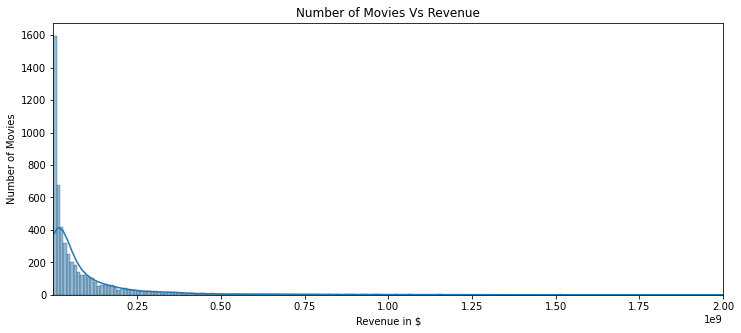

In [ ]:
#Plotting a histogram for Revenue
fig, ax = plt.subplots(figsize= (12,5))
sns.histplot(data=movies_metadata_4, x="revenue", kde=True, binwidth= 10000000, ax=ax)
ax.set_xlim(1, 2000000000)
plt.title('Number of Movies Vs Revenue')
plt.xlabel('Revenue in $')
plt.ylabel('Number of Movies')
plt.show()

Well that is VERY skewed. Let's zoom in on the movies that have made <$100,000

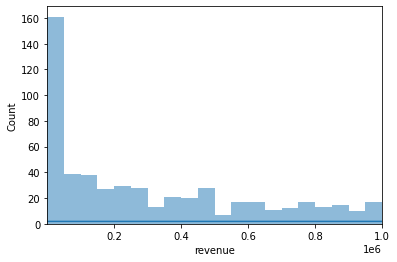

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=movies_metadata_4, x="revenue", kde=True, binwidth= 50000, ax=ax)
ax.set_xlim(10, 1000000) 
plt.show()

The movies distribution is highly right skewed with 75% of the population with revenues between $1 to $67 million dollars, while the other 25% of the population is reaching maximum levels of $2.7 nillion dollars.

### Features Analysis

Let's first take a look at **genres**. What do we have for top 10 genres?




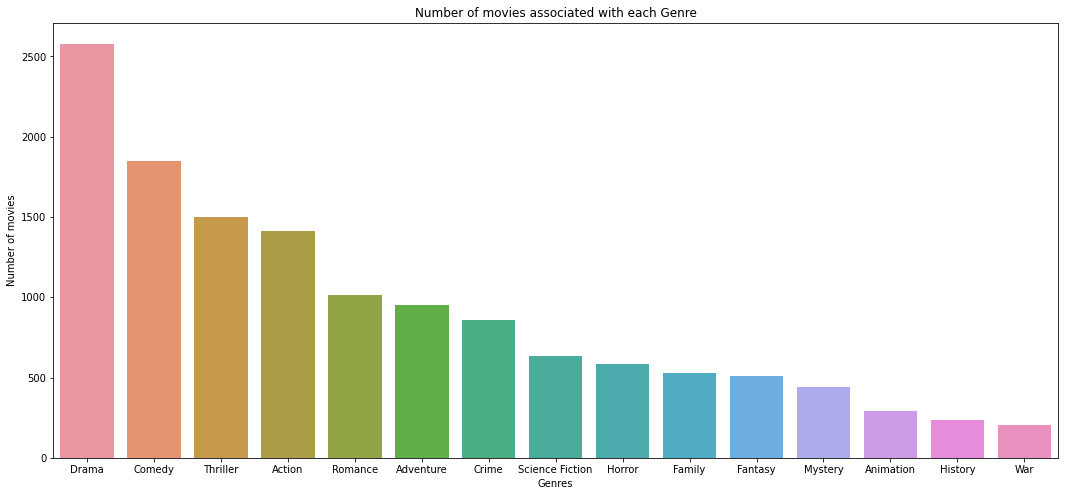

In [ ]:
#Plotting a bar graph of Genre by its frequencies
plt.figure(figsize=(18,8))
sns.barplot(x='genres', y='movies', data=genre_count.head(15))
plt.title('Number of movies associated with each Genre')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.show()

We can conclude that Drama is the most produced type of genre representing 18% of the movies analyzed. In addition, 80% of the movies genres are represented by the first 8 types (Drama, Comedy, Thriller, Action, Romance, Adeventure, Crime, Sci-Fi and Horror).

In [ ]:
#Selection of Top 10 genres
v_genres = ['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime','Science Fiction', 'Horror', 'Fantasy', 'Animation']
v_movies = genre_df[(genre_df['genres'].isin(v_genres))]

Great. Now let's start checking out the revenues of top 10 genres across time.

<Figure size 1296x576 with 0 Axes>

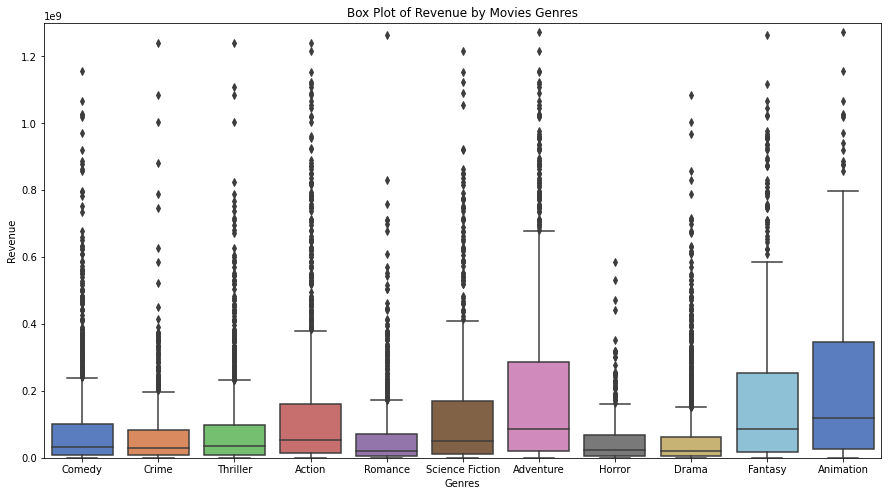

In [ ]:
#Box plot graph between revenue and genres
plt.figure(figsize=(18 ,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genres', y='revenue', data=v_movies, palette="muted", ax =ax)
ax.set_ylim([0, 13e8])
plt.title('Box Plot of Revenue by Movies Genres')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.show();

We can conclude that Adventure, Animation and Fantasy genres are the ones with a higher expectation of revenue (Median revenue and 75 percentalie higher than the rest), while Crime, Drama, Romance and Horror are the lowest.

Let's see how **ratings (votes)** compared to revenue... Does high movie rating mean revenue is going to be good?

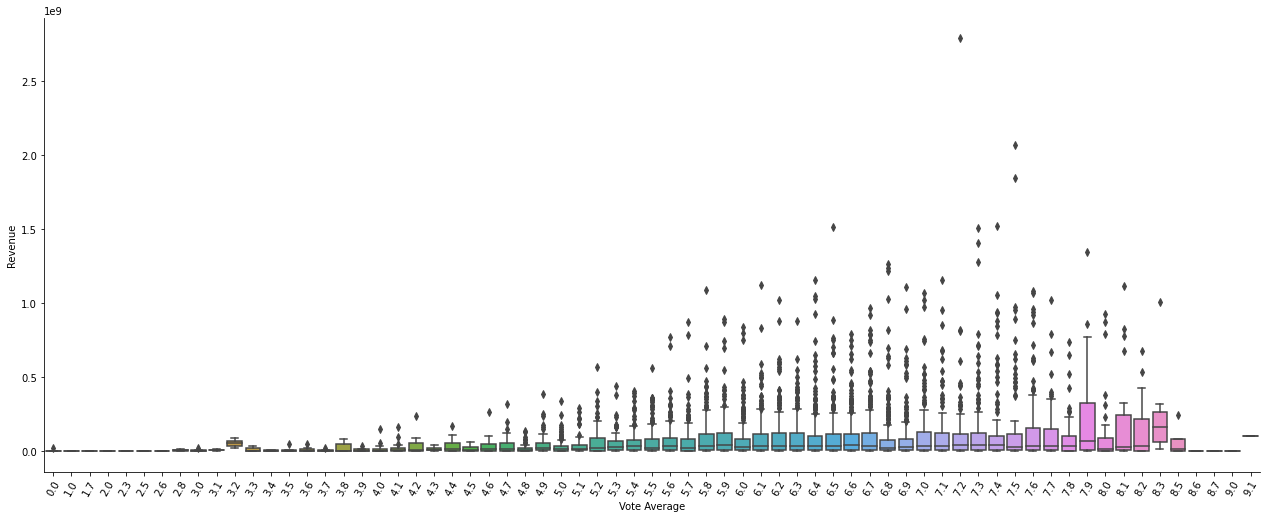

In [ ]:
vote_average_to_revenue = sns.catplot(x='vote_average', y='revenue',kind="box", height=7, aspect=2.5,data=movies_metadata_4)
vote_average_to_revenue.set_axis_labels('Vote Average', 'Revenue')
vote_average_to_revenue.set_titles('Revenues generated Vs movie vote average')
vote_average_to_revenue.set_xticklabels(rotation=60);

Just a zoom of our previous graph

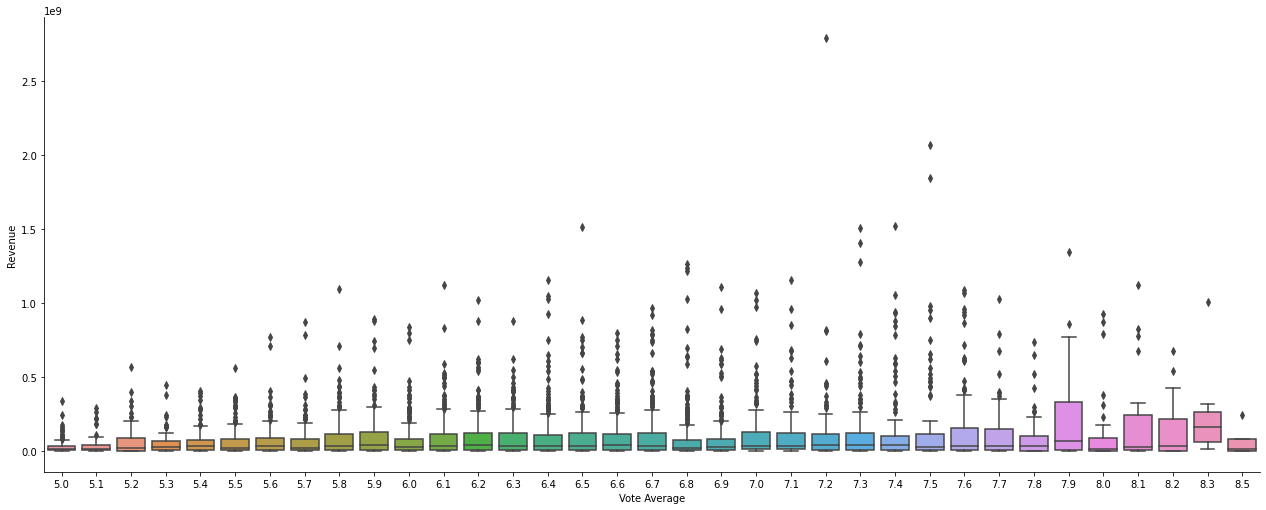

In [ ]:
vote = movies_metadata_4[(movies_metadata_4['vote_average'] >= 5) & (movies_metadata_4['vote_average'] <= 8.5)]
vote_average_to_revenue_five = sns.catplot(x='vote_average', y='revenue',kind="box", height=7, aspect=2.5,data=vote)
vote_average_to_revenue_five.set_titles('Revenues generated Vs movie vote average')
vote_average_to_revenue_five.set_axis_labels("Vote Average","Revenue");

Not completly true, as we identified movies with high voting values (above 8.5), but with less revenue associated. That means that are other features that also influence the values of revenue. The highest revenue movies are rated between 6.7 and 8.3


We know movies are more popular now than ever, so are we making more movies than we used to?

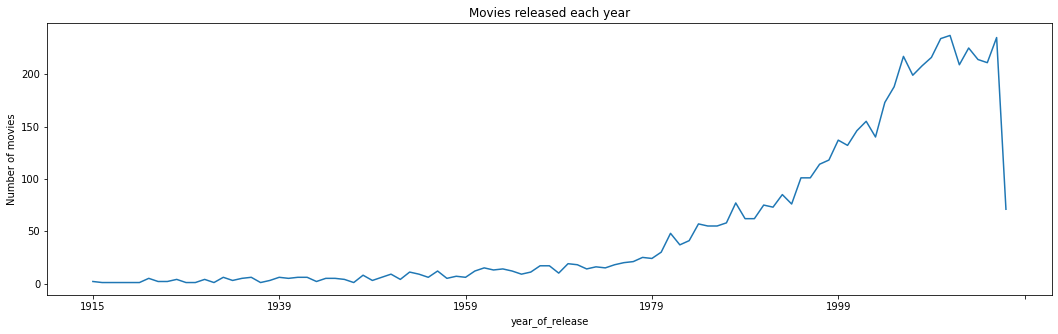

In [ ]:
movies_per_year = movies_metadata_4.groupby('year_of_release')['movie_id'].count()
plt.figure(figsize=(18,5))
plt.ylabel('Number of movies')
plt.xlabel('Year of Release')
plt.title('Movies released each year')
movies_per_year.plot();

Yes we are. Since 1979 movies production has increased exponentially.

Has **budget** gone up over the tenure of movie making?

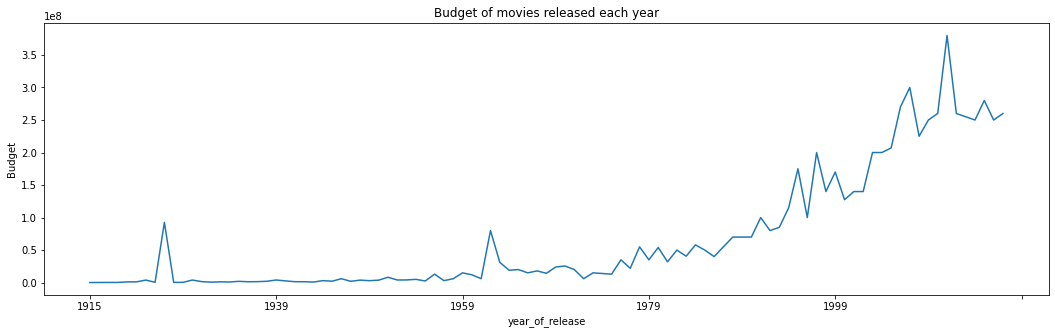

In [ ]:
max_budget_per_year = movies_metadata_4.groupby('year_of_release')['budget'].max()
plt.figure(figsize=(18,5))
plt.ylabel('Budget')
plt.xlabel('Year of Release')
plt.title('Budget of movies released each year')
max_budget_per_year.plot();

Yes. Movies budget has increased also over time, which means that producer companies are making higher investments by improving the quality of movies.

In [ ]:
movies_valid_budget_revenue = movies_metadata_4.dropna(subset = ['budget'])

Let's see how Revenue and **Budget** are related

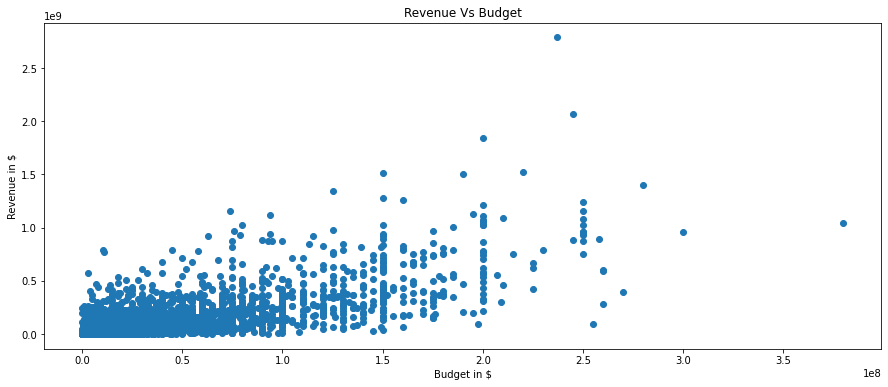

In [ ]:
X = movies_valid_budget_revenue[['budget']]
y = movies_valid_budget_revenue[['revenue']]
plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.title('Revenue Vs Budget')
plt.xlabel('Budget in $')
plt.ylabel('Revenue in $')
plt.show();

fitting a linear regression in target variable vs. features

Checking that a linear relationship exists between the target variable and the independent variable/s

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


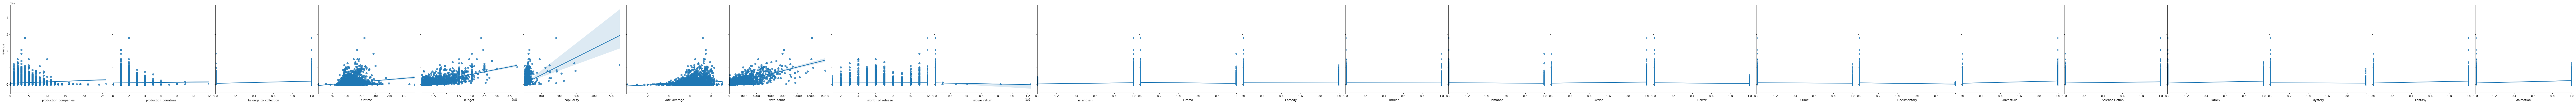

In [ ]:
drop = ['revenue','movie_id','title','genres','spoken_languages','status','release_date',
        'year_of_release', 'movieId','N_ratings','AVG_rating', 'Other_Genres']
X_vars = movies_metadata_4.drop(drop, axis=1)
sns.pairplot(movies_metadata_4, x_vars=X_vars, y_vars='revenue', size=5, kind='reg')

### Correlation Between Features

Let's check out a correlation map between all the variables. The further away the correlation coefficient is from 0, the stronger the relationship between the two variables.
* -1 indicates a perfectly negative linear correlation between two variables
* 0 indicates no linear correlation between two variables
* 1 indicates a perfectly positive linear correlation between two variables

Let's make sure to take out irrelevant variables such as "Movie ID" as we do it and other ones that we considered from previous analysis.

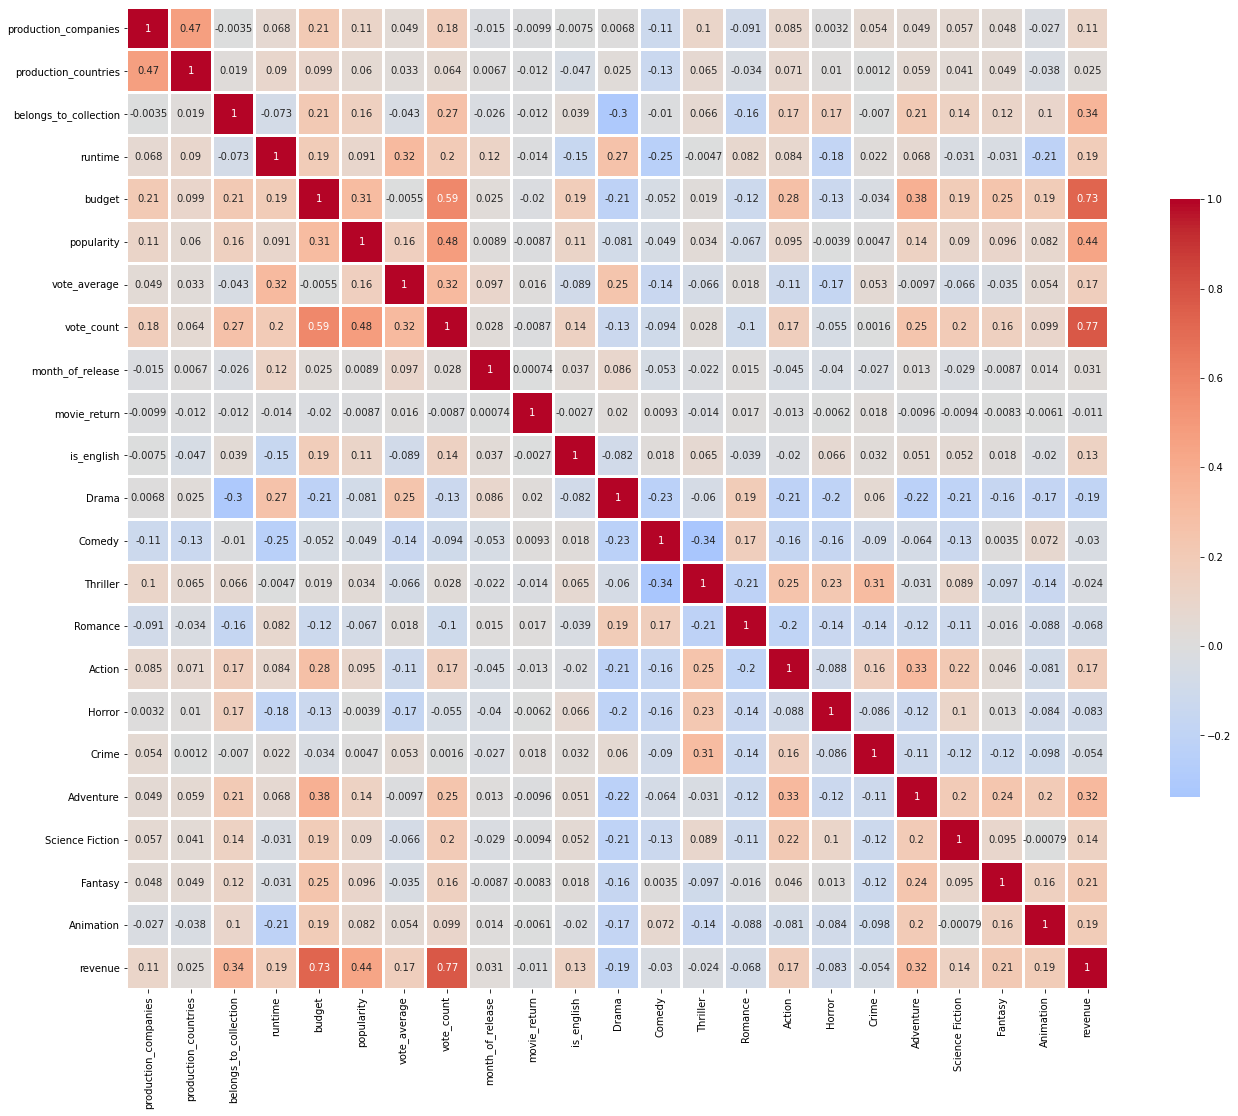

In [ ]:
movie_hm = movies_metadata_4.drop(columns=['movie_id', 'movieId', 'Other_Genres', 'AVG_rating', 'N_ratings', 'Mystery', 'Family', 'Documentary'])
col_name="revenue"
last_col = movie_hm.pop(col_name)
movie_hm.insert(28, col_name, last_col)
corr = movie_hm.corr()
f, ax = plt.subplots(figsize= (22,22))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1.0, center=0, square=True, linewidths=2, cbar_kws={'shrink': .5})

From the Matrix we can conclude the following points:
* Budget and the number of votes are strongly positively correlated with Revenue. More budget and votes are strongly related to higher movie revenue.
* Drama is negatively correlated with Revenue. A movie with Drama genre is related to lower movie revenue.
* Variables: Movie return, Month of release, Production countries, Comedy ,  Thriller , Horror have almost zero relation with the revenue. Can be potential variables to be dropped in further model iterations.

# **3**. Model Development

## **Revenue Prediction**

In [ ]:
movies_metadata_4.head(2)

,movie_id,title,production_companies,production_countries,genres,belongs_to_collection,spoken_languages,status,release_date,runtime,budget,revenue,popularity,vote_average,vote_count,year_of_release,month_of_release,movie_return,movieId,AVG_rating,N_ratings,is_english,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,Other_Genres
0,5,Four Rooms,2,1,"[Crime, Comedy]",0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1995-12-09,98.0,4000000.0,4300000.0,9.026586,6.5,539.0,1995,12,1.075000,5.0,3.079565,15258.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,11,Star Wars,2,1,"[Adventure, Action, Science Fiction]",1,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1977-05-25,121.0,11000000.0,775398007.0,42.149697,8.1,6778.0,1977,5,70.490728,11.0,3.660591,19475.0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [ ]:
#List of variables that we would like to drop from the model development
drop = ['revenue','movie_id','title','genres','spoken_languages','status','release_date',
        'year_of_release', 'movieId','N_ratings','AVG_rating', 'movie_return', 'Other_Genres']

The first task would be to define our feature matrix (DataFrame - X) that includes all the variables except our target variable "Revenue", and the Target Vector (y)

In [ ]:
X = movies_metadata_4.drop(drop, axis=1) #feature matrix
X.shape

(5369, 24)

In [ ]:
y = movies_metadata_4['revenue'] #target vector
y.shape

(5369,)

Now, let's evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)
print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (3758, 24)
Xtest shape: (1611, 24)


Instantiate a **linear regression model** and fit model to the training data

In [ ]:
model = LinearRegression()                         # 1. instantiate model
model.fit(Xtrain, ytrain)                          # 2. fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check the betas and intercept of the linear regression fit to the data

In [ ]:
print("Model coefficients:    ", model.coef_)
print("\nModel intercept:", model.intercept_)

Model coefficients:     [-3.65894246e+06 -7.49829878e+06  5.00100371e+07  2.64190611e+05
  1.67109400e+00  1.09031069e+06 -3.59103684e+05  6.23453828e+04
 -1.57821685e+05 -8.69186778e+06 -3.96033845e+06  3.42618753e+06
 -1.74162293e+06  1.88594029e+07 -7.67200699e+06 -8.58736081e+05
 -7.55598943e+06  2.18946994e+07  4.47926013e+06 -2.90351226e+07
  1.63932493e+07 -6.44283879e+06  5.96473184e+06  2.58533800e+07]

Model intercept: -26070367.427661613


In [ ]:
# pair the feature names with the coefficients
list(zip(X.columns, model.coef_))

[('production_companies', -3658942.4605696127),
 ('production_countries', -7498298.779285383),
 ('belongs_to_collection', 50010037.06062038),
 ('runtime', 264190.61116285203),
 ('budget', 1.67109399740579),
 ('popularity', 1090310.6899324427),
 ('vote_average', -359103.6844341442),
 ('vote_count', 62345.38283932589),
 ('month_of_release', -157821.68509385185),
 ('is_english', -8691867.77698168),
 ('Drama', -3960338.454324742),
 ('Comedy', 3426187.5298689627),
 ('Thriller', -1741622.9296789574),
 ('Romance', 18859402.941246085),
 ('Action', -7672006.989276468),
 ('Horror', -858736.0809540935),
 ('Crime', -7555989.425986061),
 ('Documentary', 21894699.371915605),
 ('Adventure', 4479260.133498485),
 ('Science Fiction', -29035122.561852746),
 ('Family', 16393249.3170314),
 ('Mystery', -6442838.787418513),
 ('Fantasy', 5964731.83732202),
 ('Animation', 25853379.99331107)]

The coefficient on budget is telling us that each extra million dollars in budget is associated with extra $1.6 million dollars in revenue, for movies with the same average value for the rest of the features

Once the model is trained, the main task would be to evaluate it based on what it says about new data that was not part of the training

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,production_companies,production_countries,belongs_to_collection,runtime,budget,popularity,vote_average,vote_count,month_of_release,is_english,Drama,Comedy,Thriller,Romance,Action,Horror,Crime,Documentary,Adventure,Science Fiction,Family,Mystery,Fantasy,Animation,revenue,predicted
0,3785,0,1,0,87.0,7300.0,0.137676,6.0,3.0,10,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,13674.0,-2.864689e+07
1,5222,3,1,1,87.0,26000000.0,7.459161,5.0,216.0,11,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,17782178.0,7.318341e+07
2,2200,3,2,0,93.0,1500000.0,6.026159,5.6,88.0,9,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,5728953.0,-5.666937e+07
3,676,2,1,1,88.0,1700000.0,12.843375,6.1,243.0,6,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,9700000.0,1.582986e+07
4,2389,1,1,1,98.0,8.0,10.187623,6.4,139.0,9,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,16.0,4.940065e+07


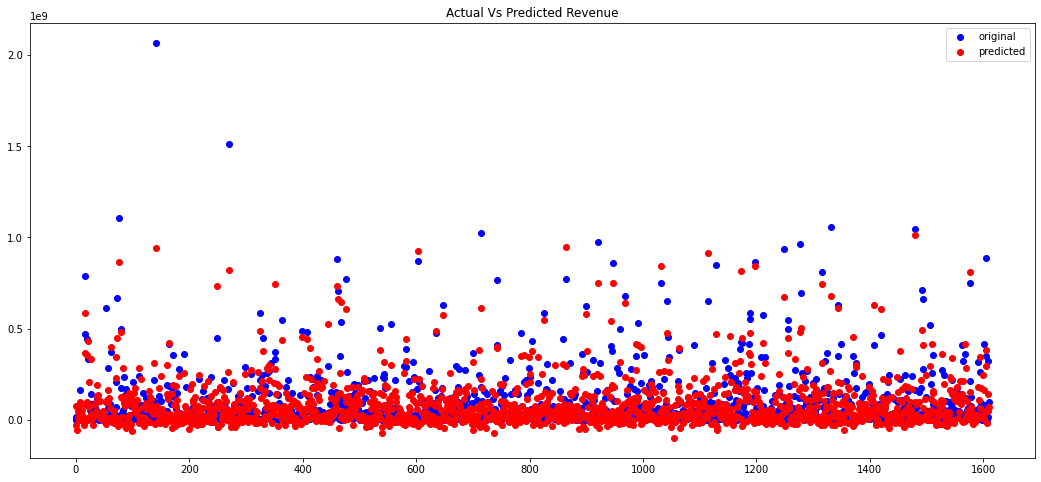

In [ ]:
y_len = list(range(len(ytest)))
plt.figure(figsize=(18,8))
plt.title('Actual Vs Predicted Revenue')
plt.scatter(y_len, ytest, color="blue", label="original")
plt.scatter(y_len, y_model, color="red", label="predicted")
plt.legend()
plt.show()

### Performance Evaluation


**R-squared**, is the proportion of the variance in the response variable that can be explained by the predictor variables in a linear regression model. The value for R-squared can range from 0 to 1. A value of 0 indicates that the response variable cannot be explained by the predictor variable at all while a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variables.

In [ ]:
#R-squared value for the model
model.score(Xtest, ytest)

0.7529850573209288

The **adjusted R-squared** is a modified version of R-squared that adjusts for the number of predictors in a regression model. Since R2 always increases as you add more predictors to a model, adjusted R2 can serve as a metric that tells you how useful a model is, adjusted for the number of predictors in a model.

In [ ]:
#display adjusted R-squared
1 - (1-model.score(Xtest, ytest))*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)

0.7492471262841711

The adjusted R2 means that the **74.9%** of variation of the movies revenues is explained by variation in the independent variables (features). 

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

In [ ]:
# calculate MAE
print("MAE: ", mean_absolute_error(ytest, y_model))

MAE:  46052207.04214407


The average magnitude of the errors in the set of revenue predictions is **$46,052,207** dollars

In [ ]:
# calculate MSE
print("MSE: ", mean_squared_error(ytest, y_model))

MSE:  6103199510285029.0


MSE can represent the difference between the actual observations and the observation values predicted by the model. In this context, it is used to determine the extent to which the model fits the data as well as whether removing some explanatory variables is possible without significantly harming the model’s predictive ability. The MSE is a measure of the quality of an estimator — it is always non-negative, and *values closer to zero are better*.

In [ ]:
# calculate RMSE
print("RMSE: ",np.sqrt(mean_squared_error(ytest, y_model)))

RMSE:  78122976.83962785


### Feature Engineering

We also use stastsmodels package to perform OLS (Ordinary Least Squares) which give us a better summary table to analyze the predictive power of each of the variable coefficients

In [ ]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     656.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:07:19   Log-Likelihood:            -1.0556e+05
No. Observations:                5369   AIC:                         2.112e+05
Df Residuals:                    5344   BIC:                         2.113e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.002e+

From the table, we can see that adjusted-R2 (74.7%) is very similiar from the one obtained from sckilearn. By looking at the p-value for each of the variables, we can indentify those with less than 0.05 which would be considered statistically significant, while the other can be removed from the features matrix and run again the model.

In [ ]:
#List of new variables that we would like to drop from the model development
drop_new = ['revenue','movie_id','title','genres','spoken_languages','status','release_date',
        'year_of_release', 'movieId','N_ratings','AVG_rating', 'movie_return', 'Other_Genres',
        'vote_average', 'month_of_release', 'Drama', 'Comedy', 'Thriller', 'Horror', 'Mystery', 'Fantasy'] #New variables excluded from the model

X_new = movies_metadata_4.drop(drop_new, axis=1) #feature matrix
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.3, random_state=833)
model = LinearRegression()                         
model.fit(Xtrain, ytrain)    
y_model_new = model.predict(Xtest)
model.score(Xtest, ytest)

0.7533484191834057

In [ ]:
#display adjusted R-squared
1 - (1-model.score(Xtest, ytest))*(len(ytest)-1)/(len(ytest)-Xtest.shape[1]-1)

0.7508726191250208

**By** dropping non-significant variables we were able to increase the model discrimination power from 74.9% to 75.1%

In [ ]:
X = sm.add_constant(X_new) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     983.5
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        02:07:33   Log-Likelihood:            -1.0557e+05
No. Observations:                5369   AIC:                         2.112e+05
Df Residuals:                    5352   BIC:                         2.113e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.483e+

## Profit Classification

Lets see if we can classify movies based on profitability by using movie_return (Revenue/Budget)

1.   If the movie makes a profit (return>1) then categorical variable profit = 1
2.   Else categorical variable profit = 0 indicating that the movie made a loss



In [ ]:
movies_metadata_4['profit'] = movies_metadata_4['movie_return'].apply(lambda x: 1 if x >1 else 0)
movies_metadata_4['profit'].value_counts()

1    3748
0    1621
Name: profit, dtype: int64

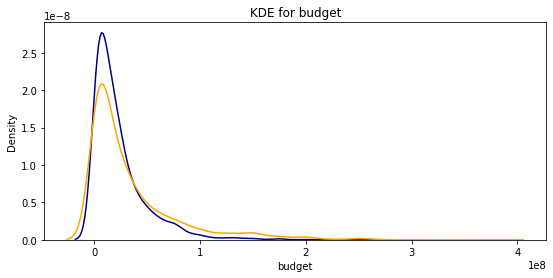

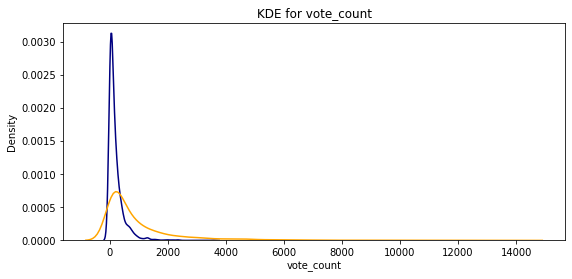

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(movies_metadata_4[movies_metadata_4['profit'] == 0][feature].dropna(), color= 'navy', label= 'Profit: No')
    ax1 = sns.kdeplot(movies_metadata_4[movies_metadata_4['profit'] == 1][feature].dropna(), color= 'orange', label= 'Profit: Yes')
kdeplot('budget')
kdeplot('vote_count')

So it seems that the higher the budget and vout counts it is a higher change to have a profitable movie

In [ ]:
percent = round(movies_metadata_4['profit'].value_counts()[1]/(movies_metadata_4['profit'].value_counts()[1]+movies_metadata_4['profit'].value_counts()[0])*100,2)
print(percent)

69.81


**💰 69.81% of the movies make a profit! 💰**

A random chance model has a prediction accuracy of 69.81% 

Lets see if our classification models perform better than that!

In [ ]:
X = movies_metadata_4.drop(drop, axis=1) #feature matrix
X = X.drop('profit', axis=1)
X.shape

(5369, 24)

In [ ]:
y = movies_metadata_4['profit']
y.shape

(5369,)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833, stratify=y)
print("Xtrain shape:", Xtrain.shape)
print("Xtest shape:", Xtest.shape)

Xtrain shape: (3758, 24)
Xtest shape: (1611, 24)


Trying multiple models to compare their classifications
1. Gradient boosting Classifier
2. KNN
3. Logistic Regression

In [ ]:
gradient_model = GradientBoostingClassifier()
KNN_model = KNeighborsClassifier(n_neighbors=5)
Logistic_model = LogisticRegression(solver='liblinear')

Fitting all models with the training data

In [ ]:
gradient_model.fit(Xtrain, ytrain)
KNN_model.fit(Xtrain, ytrain)
Logistic_model.fit(Xtrain, ytrain);

Predicting using the test data

In [ ]:
gradient_prediction = gradient_model.predict(Xtest)
KNN_prediction = KNN_model.predict(Xtest)
Logistic_prediction = Logistic_model.predict(Xtest)

### Performance Evaluation

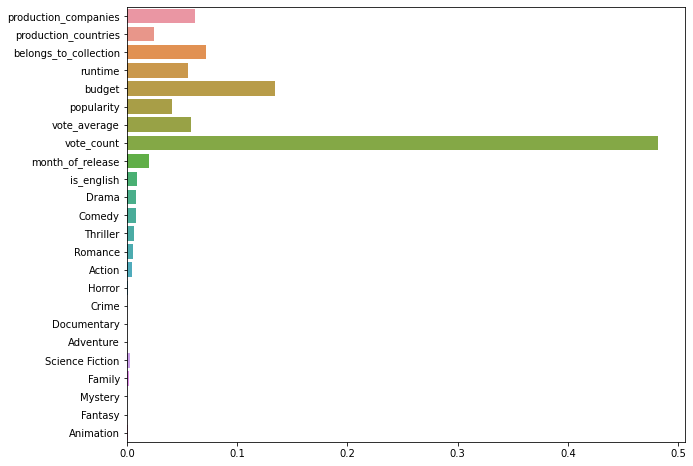

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=gradient_model.feature_importances_, y=X.columns);

In [ ]:
print('Accuracy score of gradient model is: ' + str(accuracy_score(gradient_prediction, ytest)))
print('Accuracy score of KNN model is     : ' + str(accuracy_score(KNN_prediction, ytest)))
print('Accuracy score of Logistic model is: ' + str(accuracy_score(Logistic_prediction, ytest)))

Accuracy score of gradient model is: 0.7827436374922409
Accuracy score of KNN model is     : 0.7082557417752948
Accuracy score of Logistic model is: 0.6983240223463687


From the accuracy score, the gradient boosting classifier definitely performs better than a random chance model and its better that the other classification models. **We can predict if a movie would be profitable 78% of the time!**

Confusion Matrix and Classification Report give more details about performance

In [ ]:
print('\n Confusion matrix of gradient model:')
print(confusion_matrix(gradient_prediction, ytest))
print('\n Confusion matrix of KNN model:')
print(confusion_matrix(KNN_prediction, ytest))
print('\n Confusion matrix of logistic model:')
print(confusion_matrix(Logistic_prediction, ytest))


 Confusion matrix of gradient model:
[[265 129]
 [221 996]]

 Confusion matrix of KNN model:
[[197 181]
 [289 944]]

 Confusion matrix of logistic model:
[[   0    0]
 [ 486 1125]]


How many of the correctly predicted cases actually turned out to be positive?

Precision
*   Gradient model: 54.5%
*   NN model: 40.5%
*   logistic model: 0%

How many of the actual positive cases we were able to predict correctly with our model?

Recall
*   Gradient model: 67%
*   NN model: 52%
*   logistic model: 0%

**Based on the true positives and and true negatives, the gradient model is better than the KNN model for this analysis.**

In [ ]:
print('\n Classification report of gradient model:')
print(classification_report(gradient_prediction, ytest))
print('\n Classification report of KNN model:')
print(classification_report(KNN_prediction, ytest))
print('\n Classification report of Logistic regression:')
print(classification_report(Logistic_prediction, ytest));


 Classification report of gradient model:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60       394
           1       0.89      0.82      0.85      1217

    accuracy                           0.78      1611
   macro avg       0.72      0.75      0.73      1611
weighted avg       0.80      0.78      0.79      1611


 Classification report of KNN model:
              precision    recall  f1-score   support

           0       0.41      0.52      0.46       378
           1       0.84      0.77      0.80      1233

    accuracy                           0.71      1611
   macro avg       0.62      0.64      0.63      1611
weighted avg       0.74      0.71      0.72      1611


 Classification report of Logistic regression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.70      0.82      1611

    accuracy                           0.70      1611

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's plot the ROC CURVE for gradient boosting classifier

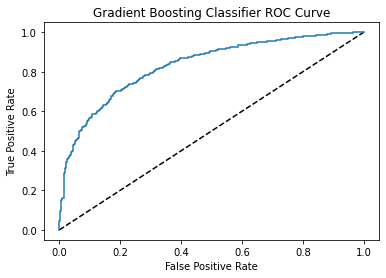

In [ ]:
y_pred_prob = gradient_model.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC Curve')
plt.show();

In [ ]:
print('AUC score of the Gradient Boosting Classifier is : ' + str(roc_auc_score(ytest, y_pred_prob)))

AUC score of the Gradient Boosting Classifier is : 0.8317073616826703


Based on the ROC curve and it's area under the curve (AUC), we can conclude the **the gradient model is having a good discrimination power (83%)**. The higher the AUC, the better the performance of the model at distinguishing between the making a profit and or making a loss with a movie release.

# **5. Challenges Faced and future Scope**

## Challenges 💪

### Data Cleaning

* We started with a Movies dataset of 45,466 records and ended up with one of only 5,365 (88.2% of the DF was removed). This reduction was explained by the low quality of the data related with the target variable we were expecting to predict (Revenue).
* For our target variable we had only 7,414 records with a revenue value. From that number, then we dropped some duplicate movies and the ones without a budget value (~27%). That is how our master DF finalize with 5,365 records.
* We had to change the type of certain variables (mainly from object to int/float types) and convert categorical/dictonary variables into dummies. 





### Multiple features that impact revenue

* We executed univariate and descriptive analysis in the data to be sure of the quality and to make any kind of data adjustments (Scatterplots to look for non-linearities or outliers/ variable transformations if needed / correlation analysis to avoid multicollinearity between explanatory variables), however it was not easy to decide the best set of variables to introduce and then removed from the model.

### Prediction Accuracy

* Small sample size: Modeling something as complex as the expected revenue of a new movie launched requires more data that the one we were able to gather and train-test our model.

* Despite the small sample size of both the train and test datasets, the model descrimination power for the linear regression model was 75%, which is an acceptable level.

## Future scope 🔮



The data gathered so far seems to be predictive for building a revenue regression model for movies. However, if we would like to improve the fit of our prediction model, we would recommend the following:
search and gather the following variables: 

1. Cast - Number of Academy Awards, popularity
2. Weighted values for production companies
3. Mode of release also might be applicable as the world is moving towards subscription based viewing

Additionally we recommend,
1.   Search and gather additional variables that could potentially increase predictability in the model.
2.   Ensure quality of historical revenue and budgets variables, while gather more records.
3. Reduction of dimensionality
4. Ensure a larger sample for both Train and Testing the model (n > 10,000 records)


